## Machine Learning - Ex.7


Submitted by: Raz Gvili

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy


### The K-means algorithm

Implement the K-means algorithm:

Your function should get the $n\times d$ samples matrix (one in each row) and the number of clusters K.

Init the K cluster centers $\mu_j,\ \ j=0,..,K-1$ with a random choice out of the K samples.

Then iterate the algorithm's two steps, until convergence (no change in the samples assignments):

**step 1:** sample assignment:

**step 2:** update cluster centers:

Your function should return:
1. a vector $y\in R^n$ of the final assingments:
$$y_i\in\{0,1,..,K-1\}$$
2. a matrix C (of size $k\times d$) containing all the *clusters centers* (one in each row).
3. The total cost $J$ of the final solution.

Test your function on the simple 2-D data below.


hint: matplotlib's *scatter* plot might come handy for visualization: <https://matplotlib.org/gallery/shapes_and_collections/scatter.html>



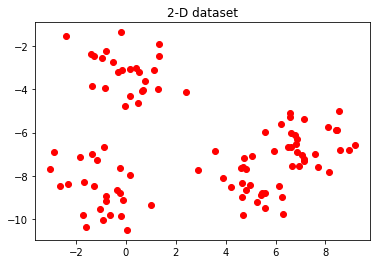

In [2]:
data=np.loadtxt('samples2D.csv', delimiter=',')

plt.plot(data[:,0],data[:,1],'or')
plt.title('2-D dataset')
plt.show()

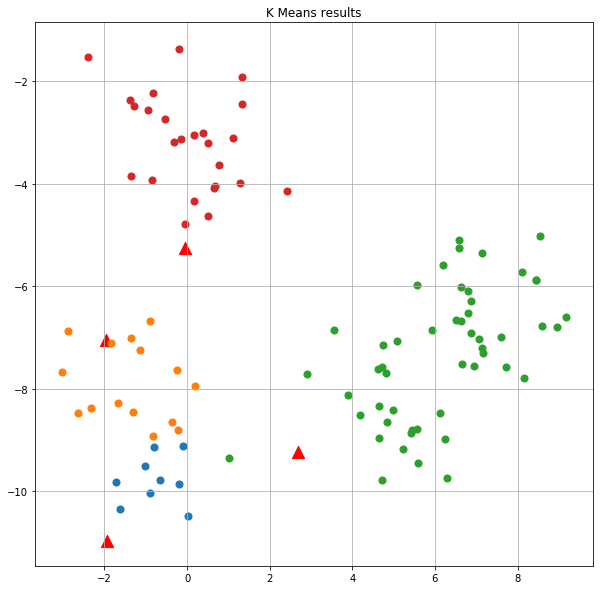

In [49]:
# Number of clusters
K_input = 4

# Err maximum allowed 
Eps = 0.0001

def kmean(X, K, Eps):

    # Generate random centers
    
    # Number of features in the data points
    dataFeatures = data.shape[1]
    
    # Amount of training data points
    n = data.shape[0]
    
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    centers = np.random.randn(K,dataFeatures) * std + mean   
    
    # Store old & new centers
    centers_old = np.zeros(centers.shape) 
    centers_new = deepcopy(centers)
    
    data.shape
    clusters = np.zeros(n)
    distances = np.zeros((n,K))

    J = np.linalg.norm(centers_new - centers_old)
    J_values = [J]
    
    while J > Eps:
        
        # print ("J value: ", J)
        
        # Measure the distance to every center
        for i in range(K):
            distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
            
        # Assign all training data to closest center
        clusters = np.argmin(distances, axis = 1)

        centers_old = deepcopy(centers_new)
        
        # Calculate mean for every cluster and update the center
        for i in range(K):
            centers_new[i] = np.mean(data[clusters == i], axis=0)
            
        J = np.linalg.norm(centers_new - centers_old)
        J_values.append(J)
        
    return clusters ,centers, J_values

y, centers, J_values = kmean(data, K_input, Eps)


plt.figure(figsize=(10,10))

plt.scatter(centers[:,0], centers[:,1], marker='^', c='r', s=150)

for i in range(K_input):
    plt.scatter(data=data, x=data[:,0][y == i], y=data[:,1][y == i], edgecolor='face', s=50)

plt.title("K Means results")
plt.grid()
plt.show()

### Repeat with different initializations

In order to try and avoid *local minima*, you will run the `k-means` algorithm $N=100$ times, each time with a different random initialization, and return the results (y, C, J) of the best run (the one with the minimal J).



C:\Users\razik\AppData\Local\conda\conda\envs\py3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\razik\AppData\Local\conda\conda\envs\py3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


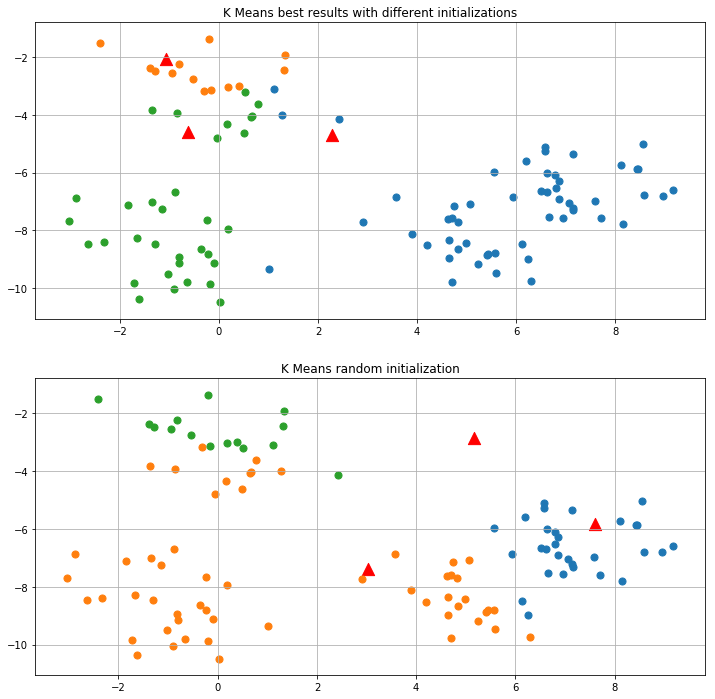

In [83]:
# Number of clusters
K_input = 3

# Err maximum allowed 
Eps = 0.01


def kmeans_repeat(X=data, K=3, Epsilon=Eps, N=1000):
    
    # First guess - tep minimum
    best_y, best_centers, best_J_values = kmean(X, K, Epsilon)
    
    for i in range(N-1):
        y, centers, J_values = kmean(data, K_input, Eps)
        
        J_len = len(J_values)
        J_val = best_J_values[J_len-2]
        
        J_best_len = len(J_values)
        J_best_val = best_J_values[J_best_len-2]
        
        if (J_values < best_J_values):
            best_y, best_centers, best_J_values =  y, centers, J_values
    
    return best_y, best_centers, best_J_values


random_y, random_centers, random_J_values = kmean(data, K_input, Eps)
y, centers, J_value = kmeans_repeat()


plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
plt.title("K Means best results with different initializations")
plt.grid()

plt.scatter(centers[:,0], centers[:,1], marker='^', c='r', s=150)

for i in range(K_input):
    plt.scatter(data=data, x=data[:,0][y == i], y=data[:,1][y == i], edgecolor='face', s=50)

    

plt.subplot(2,1,2)
plt.title("K Means random initialization")
plt.grid()

plt.scatter(random_centers[:,0], random_centers[:,1], marker='^', c='r', s=150)

for i in range(K_input):
    plt.scatter(data=data, x=data[:,0][random_y == i], y=data[:,1][random_y == i], edgecolor='face', s=50)


plt.show()

### Determine the optimal number of clusters
In order to choose the number of clusters K, run `kmeans_repeat` on the data, each time with a different value of K (try K=1,..,8).

Plot the final result for each K (scatter plot of the data with each cluster marked by a different color).

Finally, plot the final J value as a function of K, in order to choose the K.

C:\Users\razik\AppData\Local\conda\conda\envs\py3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\razik\AppData\Local\conda\conda\envs\py3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


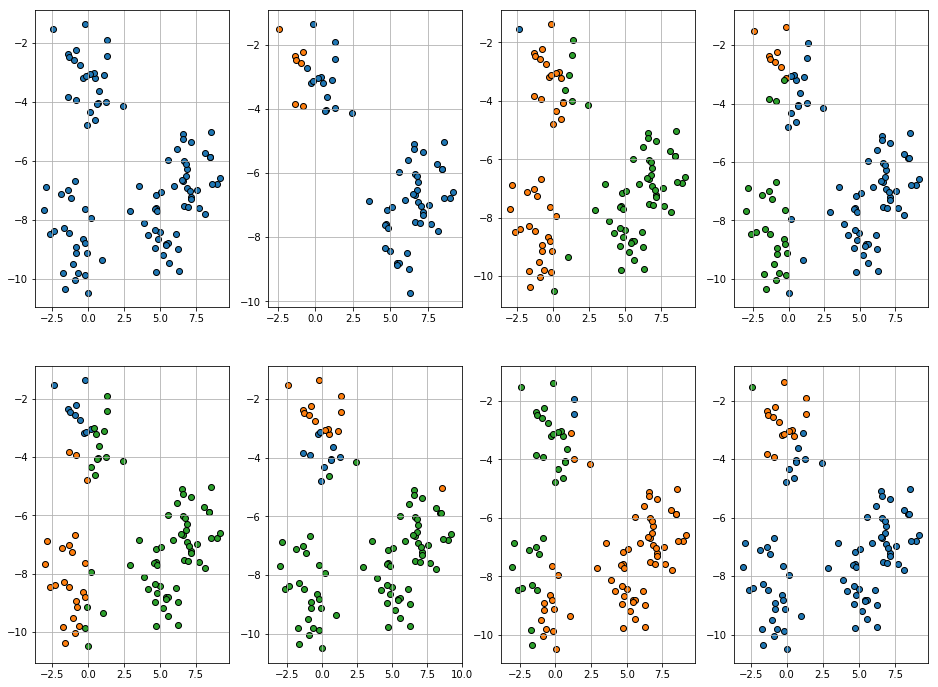

In [107]:

y1, centers1, J_value1 = kmeans_repeat(K=1)
y2, centers2, J_value2 = kmeans_repeat(K=2)
y3, centers3, J_value3 = kmeans_repeat(K=3)
y4, centers4, J_value4 = kmeans_repeat(K=4)
y5, centers5, J_value5 = kmeans_repeat(K=5)
y6, centers6, J_value6 = kmeans_repeat(K=6)
y7, centers7, J_value7 = kmeans_repeat(K=7)
y8, centers8, J_value8 = kmeans_repeat(K=8)

plt.figure(figsize=(16,12))

plt.subplot(2,4,1)
plt.grid()

for i in range(1):
    plt.scatter(data=data, x=data[:,0][y1 == i], y=data[:,1][y1 == i], edgecolor='k')
    
    
plt.subplot(2,4,2)
plt.grid()

for i in range(2):
    plt.scatter(data=data, x=data[:,0][y2 == i], y=data[:,1][y2 == i], edgecolor='k')

    
plt.subplot(2,4,3)
plt.grid()

for i in range(3):
    plt.scatter(data=data, x=data[:,0][y3 == i], y=data[:,1][y3 == i], edgecolor='k')

    
plt.subplot(2,4,4)
plt.grid()

for i in range(4):
    plt.scatter(data=data, x=data[:,0][y7 == i], y=data[:,1][y7 == i], edgecolor='k')

    
plt.subplot(2,4,5)
plt.grid()

for i in range(5):
    plt.scatter(data=data, x=data[:,0][y4 == i], y=data[:,1][y4 == i], edgecolor='k')

    
plt.subplot(2,4,6)
plt.grid()

for i in range(6):
    plt.scatter(data=data, x=data[:,0][y5 == i], y=data[:,1][y5 == i], edgecolor='k')

    
plt.subplot(2,4,7)
plt.grid()

for i in range(7):
    plt.scatter(data=data, x=data[:,0][y6 == i], y=data[:,1][y6 == i], edgecolor='k')

    
plt.subplot(2,4,8)
plt.grid()

for i in range(8):
    plt.scatter(data=data, x=data[:,0][y8 == i], y=data[:,1][y8 == i], edgecolor='k')

    
plt.show()

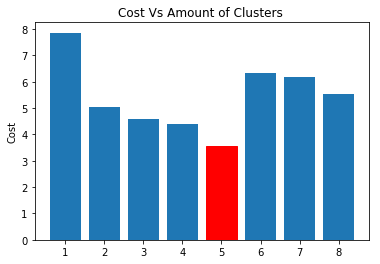

In [98]:
all_J_values = [J_value1[-2], J_value2[-2], J_value3[-2], J_value4[-2], J_value5[-2], J_value6[-2], J_value7[-2], J_value8[-2]]
x = np.arange(8)

barlist=plt.bar(x, all_J_values)
barlist[4].set_color('r')
plt.xticks(x, ('1', '2', '3', '4', '5', '6', '7', '8'))
plt.ylabel('Cost')
plt.title('Cost Vs Amount of Clusters ')
plt.show()

### Higher dimensional data

Load the `digits` dataset.

Pick only the samples of digit `4` (how many samples of it are there?)

Lets try to cluster these samples into K=3 clusters. Display each of the resulting clusters centroids.




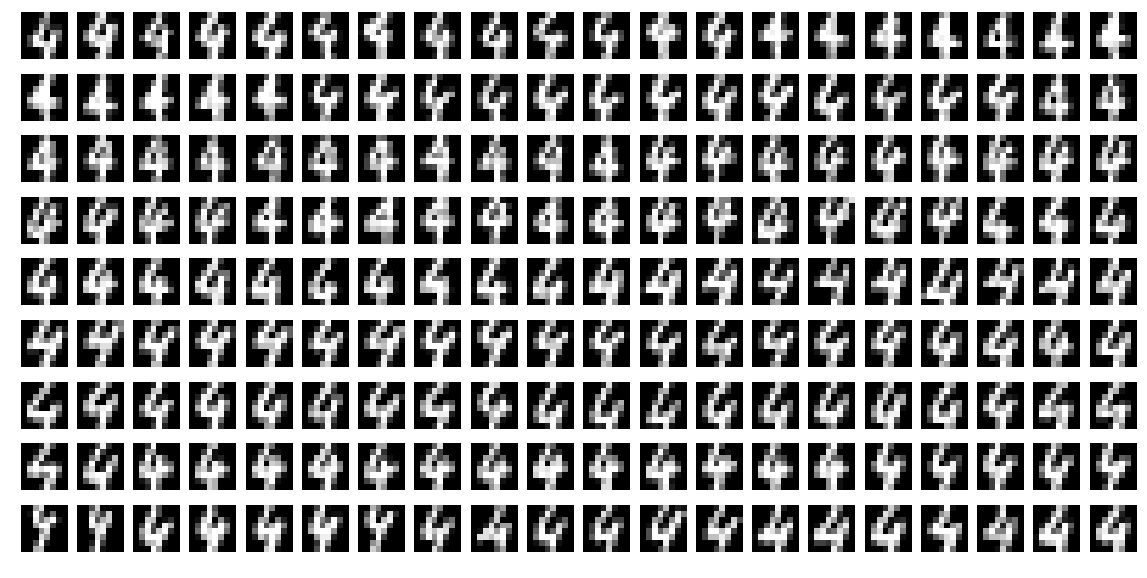

In [103]:
from sklearn import datasets

digits = datasets.load_digits() # load the dataset
X = digits.data
y = digits.target

X4 = X[y==4]

plt.figure(figsize=(20,10))
for i in range(180):
    plt.subplot(9,20,i+1)
    plt.imshow(X4[i].reshape(8,8),cmap='gray')
    plt.axis('off')
    plt.axis('equal')

In [122]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init=100, ).fit(X4)


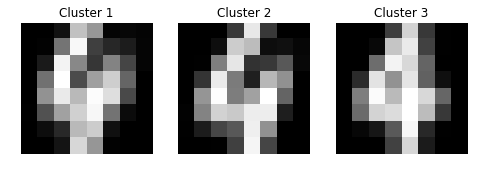

In [126]:
plt.figure(figsize=(8,8))

centers = km.cluster_centers_

plt.subplot(1, 3, 1)
plt.imshow(centers[0,:].reshape(8,8),interpolation='nearest', cmap='gray')
plt.title("Cluster 1")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(centers[1,:].reshape(8,8),interpolation='nearest', cmap='gray')
plt.title("Cluster 2")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(centers[2,:].reshape(8,8),interpolation='nearest', cmap='gray')
plt.title("Cluster 3")
plt.axis('off')

plt.show()

- Finally, repeat the same analysis for each of the other digits (`0`-`9`) as well:

In [132]:
from sklearn import datasets

digits = datasets.load_digits() # load the dataset
X = digits.data
y = digits.target

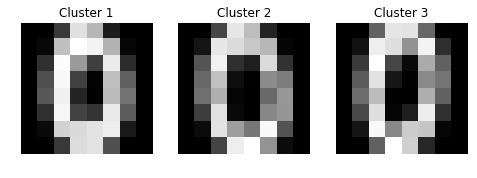

-------------------------------------------------------------------


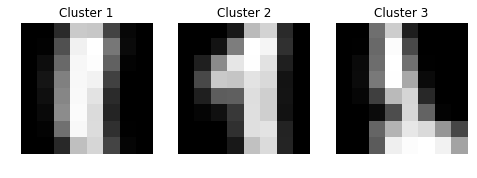

-------------------------------------------------------------------


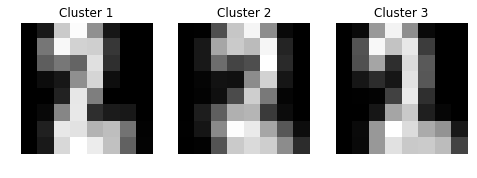

-------------------------------------------------------------------


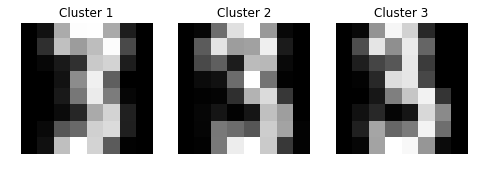

-------------------------------------------------------------------


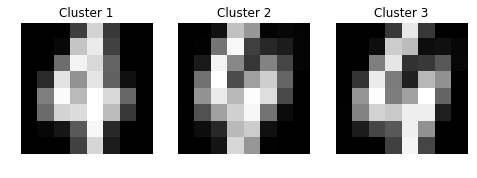

-------------------------------------------------------------------


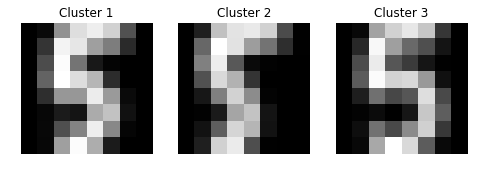

-------------------------------------------------------------------


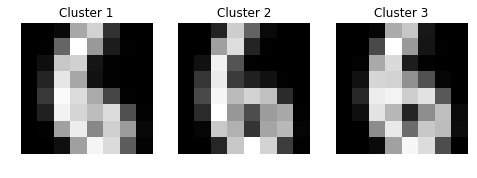

-------------------------------------------------------------------


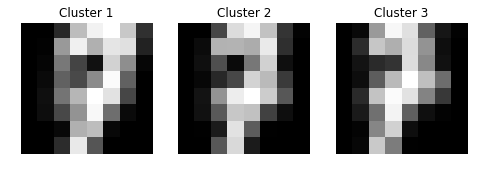

-------------------------------------------------------------------


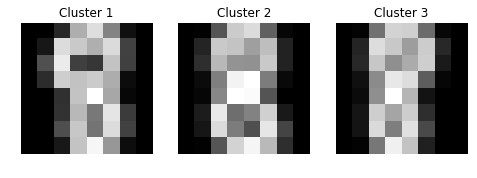

-------------------------------------------------------------------


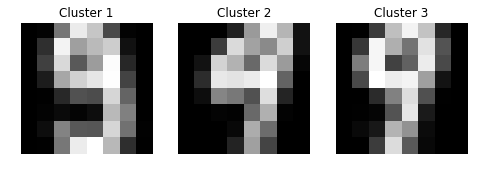

-------------------------------------------------------------------


In [135]:
for i in range(10):
    
    temp = X[y==i]
    
    km = KMeans(n_clusters=3, n_init=100).fit(temp)
    centers = km.cluster_centers_
    
    
    plt.figure(figsize=(8,8))

    plt.subplot(1, 3, 1)
    plt.imshow(centers[0,:].reshape(8,8),interpolation='nearest', cmap='gray')
    plt.title("Cluster 1")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(centers[1,:].reshape(8,8),interpolation='nearest', cmap='gray')
    plt.title("Cluster 2")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(centers[2,:].reshape(8,8),interpolation='nearest', cmap='gray')
    plt.title("Cluster 3")
    plt.axis('off')

    plt.show()
    
    print("-------------------------------------------------------------------")

## Good luck !